In [20]:
import plotly.express as px
import pandas as pd

In [21]:
data = pd.read_csv("../../datasets/Country_Medals.csv", delimiter=";")

In [22]:
data = data[data.Year>1945]

In [23]:
data.head()

,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze
192,1984,(USA),United States,Los Angeles,United States,83,61,30
193,1984,(ROU),Romania,Los Angeles,United States,20,16,17
194,1984,(FRG),West Germany,Los Angeles,United States,17,19,23
195,1984,(CHN),China,Los Angeles,United States,15,8,9
196,1984,(ITA),Italy,Los Angeles,United States,14,6,12


In [24]:
totalMedals = data.groupby("Year")[["Gold", "Silver", "Bronze"]].sum()

In [25]:
totalMedals[totalMedals.index==1984]

,Gold,Silver,Bronze
Year,,,
1984,226,219,243


In [7]:
83/226

0.3672566371681416

In [26]:
data.head()

,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze
192,1984,(USA),United States,Los Angeles,United States,83,61,30
193,1984,(ROU),Romania,Los Angeles,United States,20,16,17
194,1984,(FRG),West Germany,Los Angeles,United States,17,19,23
195,1984,(CHN),China,Los Angeles,United States,15,8,9
196,1984,(ITA),Italy,Los Angeles,United States,14,6,12


In [27]:
data[(data["Country_Name"]=="West Germany") | (data["Country_Name"]=="East Germany")].groupby("Year")

In [28]:
data['GoldNorm'] = data.groupby('Year')["Gold"].transform(lambda x: x / x.sum())

In [50]:
fig_total.layout

Layout({
    'barmode': 'group',
    'legend': {'title': {'text': 'Medal type'}, 'tracegroupgap': 0},
    'margin': {'t': 60},
    'template': '...',
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Number of medals'}}
})

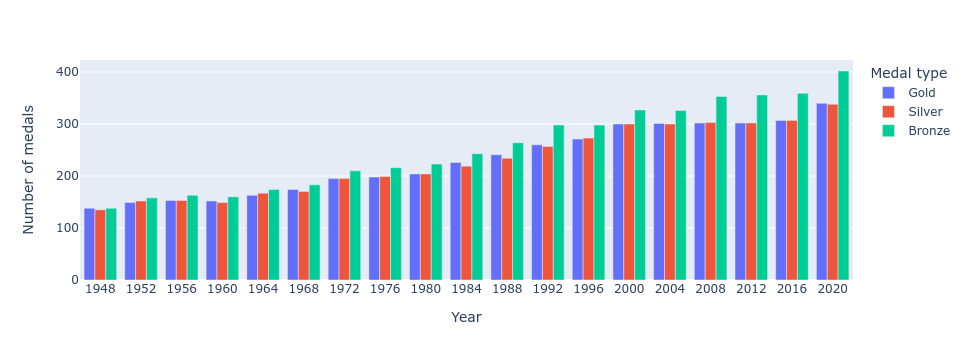

In [58]:
fig_total.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = totalMedals.index,
        ticktext = totalMedals.index
    )
)
fig_total

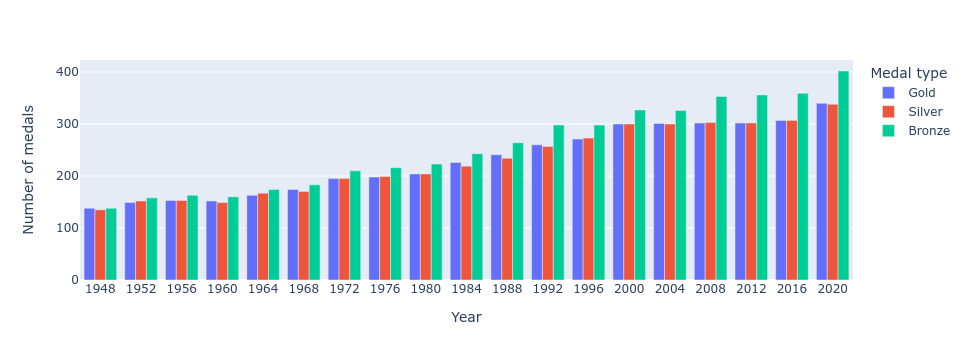

In [60]:
# , color_discrete_sequence=["Yellow", "Silver", "Brown"]
fig_total = px.bar(totalMedals, barmode='group')
fig_total.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = totalMedals.index,
        ticktext = totalMedals.index
    ),
    yaxis = dict(
        title = {"text":"Number of medals"}
    ),
    legend = dict(
        title = {"text":"Medal type"}
    )
)
# fig_total.layout.legend["title"]["text"]="Medal type"
# fig_total.layout.yaxis.title.text="Number of medals"
fig_total

In [61]:
fig_total.write_html("../../html/olympics-total_medals.html")

In [84]:
data.groupby("Country_Name")["GoldNorm"].mean().sort_values(ascending=False)[:20]

Country_Name
Soviet Union              0.238594
United States             0.188744
Unified Team              0.173077
East Germany              0.148046
China                     0.088857
Russia                    0.083869
United Team of Germany    0.059838
ROC                       0.058824
West Germany              0.053354
Germany                   0.051271
Hungary                   0.040522
Italy                     0.039259
Japan                     0.038672
Australia                 0.034618
Great Britain             0.033591
France                    0.029980
Czechoslovakia            0.022330
Romania                   0.022021
Cuba                      0.021564
Sweden                    0.021046
Name: GoldNorm, dtype: float64

In [87]:
top10 = data.groupby("Country_Name")["Gold"].sum().sort_values(ascending=False)[:20]
top10

Country_Name
United States    732
Soviet Union     395
China            262
Great Britain    166
Italy            161
Japan            154
Australia        153
East Germany     153
Russia           149
Hungary          148
France           134
Germany          133
South Korea       96
Romania           90
Cuba              80
Netherlands       73
Sweden            71
Poland            69
West Germany      56
Bulgaria          54
Name: Gold, dtype: int64

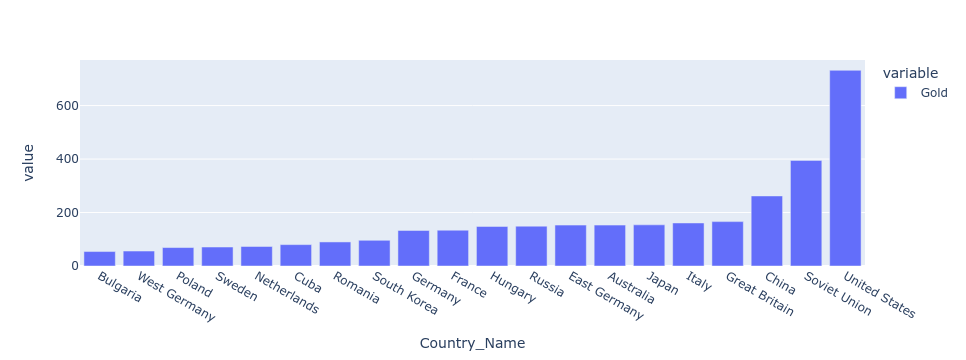

In [88]:
fig_top = px.bar(top10[::-1])
fig_top

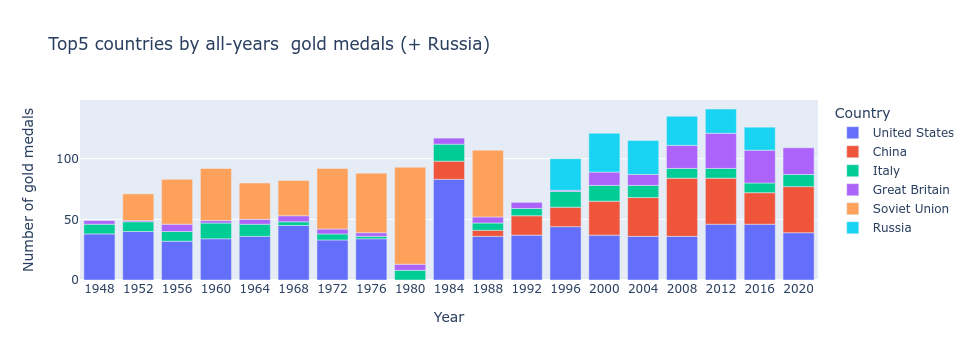

In [89]:
fig = px.bar(data[(data["Country_Name"].isin(top10.index.values[:5])) | (data["Country_Name"] == "Russia")],
             x="Year", y="Gold", color="Country_Name",
             title = "Top5 countries by all-years  gold medals (+ Russia)")
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = totalMedals.index,
        ticktext = totalMedals.index
    ),
    yaxis = dict(
        title = {"text":"Number of gold medals"}
    ),
    legend = dict(
        title = {"text":"Country"}
    )
)
fig

In [90]:
fig.write_html("../../html/olympics.html")

In [91]:
data2 = pd.read_csv("../../datasets/athlete_events.csv")

In [98]:
data2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
